In [1]:
# Import TensorFlow and hub
import tensorflow as tf
import tensorflow_hub as hub

# Plotting
import matplotlib.pyplot as plt

# some important packages
import os
import re
import numpy as np
import pandas as pd

# scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

2023-10-24 16:22:46.318079: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-24 16:22:46.424618: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 16:22:46.583208: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-24 16:22:46.583402: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-24 16:22:46.583463: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model Loaded')

Model Loaded


In [3]:
def embed(texts):
    return model(texts)

In [4]:
embed(['This movie was great!'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.00549278,  0.02886904, -0.02628895,  0.04502157, -0.01233331,
         0.02568332, -0.00071878, -0.05447305,  0.04221926, -0.01913715,
         0.02710012, -0.04328045, -0.02486853,  0.01359517,  0.00482796,
        -0.05379636,  0.01630707,  0.02139913,  0.02644027, -0.02320251,
         0.06569215, -0.10137626, -0.01691998,  0.02492479,  0.02406816,
        -0.03139618, -0.03265482, -0.05174924, -0.0727149 ,  0.10145196,
         0.03868444,  0.04380692, -0.02071746, -0.01873293, -0.03071439,
         0.01825574,  0.03627157,  0.01321462,  0.0094349 , -0.03006624,
         0.06655684,  0.01529935, -0.10101432, -0.00671949, -0.0157864 ,
         0.04991005,  0.02548565,  0.05454974, -0.0165857 ,  0.05624886,
         0.03834501, -0.08679943, -0.06096424, -0.01161774,  0.01997449,
         0.04206812, -0.04119829, -0.00768586, -0.05101155,  0.01210043,
        -0.01673213, -0.01382073,  0.00373699,  0.04911599, -0.03481684,
 

In [5]:
df = pd.read_csv("Top_10000_Movies.csv", engine="python")
df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


In [6]:
df = df[["original_title", "overview"]]
df.head()

,original_title,overview
0,Venom: Let There Be Carnage,After finding a host body in investigative rep...
1,Eternals,The Eternals are a team of ancient aliens who ...
2,Dune,"Paul Atreides, a brilliant and gifted young ma..."
3,Army of Thieves,A mysterious woman recruits bank teller Ludwig...
4,Free Guy,A bank teller called Guy realizes he is a back...


In [7]:
df = df.dropna()
df = df.reset_index()
df = df[:5500]

In [8]:
titles = list(df['overview'])

In [9]:
titles[:5]

['After finding a host body in investigative reporter Eddie Brock, the alien symbiote must face a new enemy, Carnage, the alter ego of serial killer Cletus Kasady.',
 'The Eternals are a team of ancient aliens who have been living on Earth in secret for thousands of years. When an unexpected tragedy forces them out of the shadows, they are forced to reunite against mankind’s most ancient enemy, the Deviants.',
 "Paul Atreides, a brilliant and gifted young man born into a great destiny beyond his understanding, must travel to the most dangerous planet in the universe to ensure the future of his family and his people. As malevolent forces explode into conflict over the planet's exclusive supply of the most precious resource in existence-a commodity capable of unlocking humanity's greatest potential-only those who can conquer their fear will survive.",
 'A mysterious woman recruits bank teller Ludwig Dieter to lead a group of aspiring thieves on a top-secret heist during the early stages 

In [10]:
embeddings = embed(titles)
print('The embedding shape is:', embeddings.shape)

The embedding shape is: (5500, 512)


In [11]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

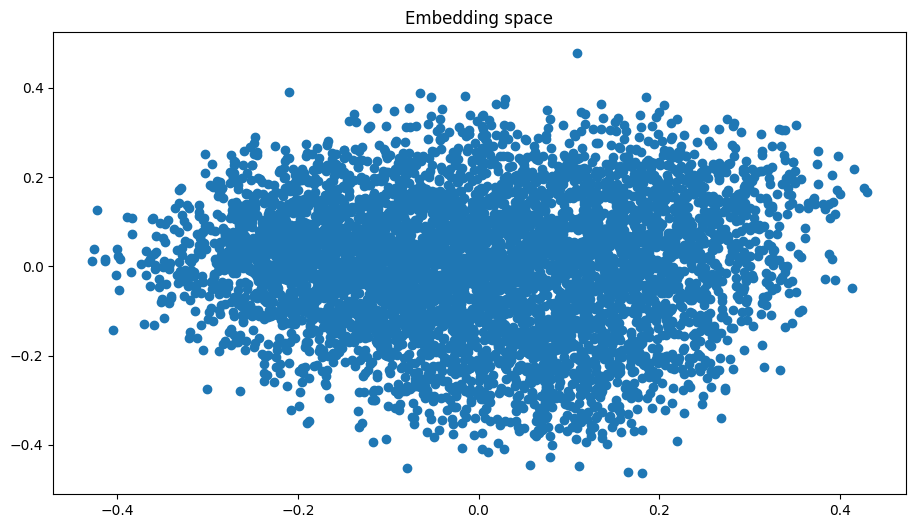

In [12]:
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [13]:
nn = NearestNeighbors(n_neighbors=10)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [14]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    return df['original_title'].iloc[neighbors].tolist()

In [15]:
print('Recommended Movies:')
recommend("Titanic")

Recommended Movies:


['Titanic',
 'Titanic II',
 'Titanic: 100 Years On',
 'Romeo + Juliet',
 'Los 7 pecados capitales',
 'The Vow',
 'Dear John',
 'Јужни Ветар 2: Убрзање',
 "Pirates of the Caribbean: At World's End",
 'Barbie & Chelsea: The Lost Birthday']

In [16]:
df = pd.read_csv("Top_10000_Movies.csv", engine="python")
print(df)

      Unnamed: 0        id original_language               original_title  \
0              0  580489.0                en  Venom: Let There Be Carnage   
1              1  524434.0                en                     Eternals   
2              2  438631.0                en                         Dune   
3              3  796499.0                en              Army of Thieves   
4              4  550988.0                en                     Free Guy   
...          ...       ...               ...                          ...   
10009       9995     530.0                en              A Grand Day Out   
10010       9996   15934.0                en                  El cantante   
10011       9997  162215.0                en               How I Live Now   
10012       9998    5723.0                en                         Once   
10013       9999  311667.0                en              Manhattan Night   

       popularity release_date  vote_average  vote_count  \
0        5401.3